In [16]:
import pandas as pd
import json

meat_df = pd.read_json(r'new_meat.json')
vegan_df = pd.read_json (r'vegan.json')
veg_df = pd.read_json(r'vegetarian.json')

vegan_df = vegan_df['recipe'].apply(pd.Series)
veg_df = veg_df['recipe'].apply(pd.Series)
meat_df = meat_df['recipe'].apply(pd.Series)
df = pd.concat([vegan_df, veg_df, meat_df])

In [17]:
df.head()

,id,kitchen-id,co2-value,eaternity-award,rating,titles,date,location,servings,recipe-portions,ingredients,food-unit
0,0_vegan,our_name_id,423,True,A,"[{'language': 'en', 'value': 'Pasta'}]",2020-09-19,Schweiz,1,1,[],0.845367
1,1_vegan,our_name_id,550,True,A,"[{'language': 'en', 'value': 'Vegi Sandwich'}]",2020-09-19,Schweiz,1,1,[],0.996958
2,2_vegan,our_name_id,1084,False,B,"[{'language': 'en', 'value': 'Tomato soup'}]",2020-09-19,Schweiz,1,1,[],0.162327
3,3_vegan,our_name_id,517,True,A,"[{'language': 'en', 'value': 'Lentil and cocon...",2020-09-19,Schweiz,1,1,[],1.007703
4,4_vegan,our_name_id,608,True,A,"[{'language': 'en', 'value': 'Peppers stuffed ...",2020-09-19,Schweiz,1,1,[],0.436423


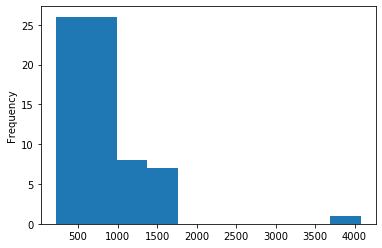

In [19]:
hist = df['co2-value'].plot.hist(bins=10)